## Have to download TeX for fancy plots...

In [1]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  pfb2t1c2pfb poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  tex-common tex-gyre texlive-base texlive-binaries texlive-fonts-recommended
  texlive-latex-base texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x
  libavalon-fram

## And coninue...

In [2]:
# prompt: Mount my Drive and also import all of the necessary packages to plot things using matplotlib, numpy and pandas.

from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd


Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set up Seaborn style for better aesthetics
sns.set(style="ticks", palette='bright')
plt.rcParams.update({
    "text.usetex": True,  # Use LaTeX for text rendering
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 15,
    "axes.titlesize": 18,
    "font.size": 12,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.dpi": 150,  # High resolution
    "savefig.dpi": 300  # High resolution for saving
})

In [4]:
# State your working directory to access the data and save the figures
wd = '/content/drive/Shareddrives/Bachelor Research Project/Final_Results/3.4.3.Variation_of_p'


In [5]:
# These are the average displacements for the entire structure after 5 seconds under the constant field

ps = pd.read_csv(f'{wd}/ps.csv', header=None, names=['p', 'Vertical Disp', 'Horizontal Disp'])

ps

,p,Vertical Disp,Horizontal Disp
0,1,0.803154,-0.244316
1,2,0.592349,-0.248993
2,3,0.631572,-0.365437
3,4,0.639501,-0.424175
4,5,0.575656,-0.527042
5,6,0.664980,-0.596999
6,7,0.573212,-0.695074
7,8,0.654962,-0.772562
8,9,0.588693,-0.884781
9,10,0.617876,-0.963870


In [6]:
# The constants for the unit cell
# The length of both Lxs and Lys will now change at each iteration

T = 5 # s
Lx = 10 # mm
Ly = 3 # mm

## Without normalisation...

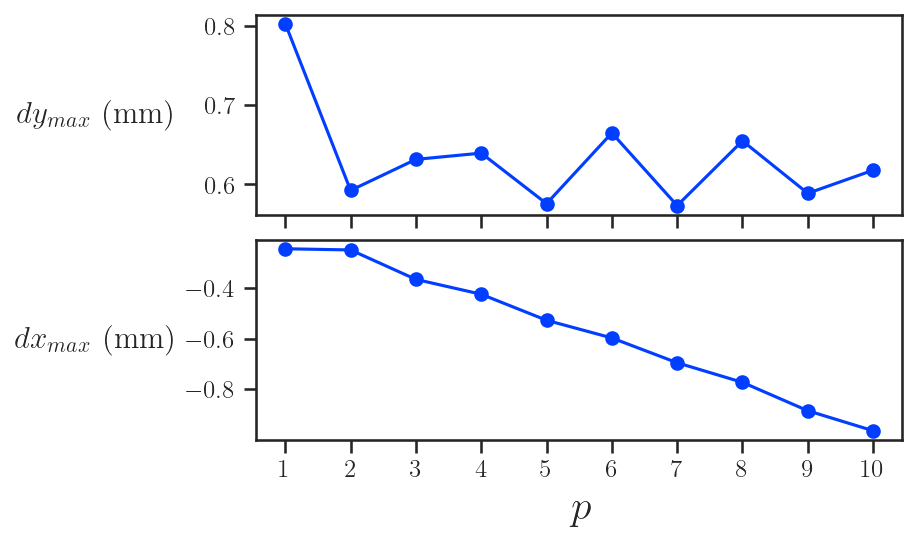

In [7]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(6, 3.5), layout='constrained')

ax[0].plot(ps['p'], ps['Vertical Disp'], '-o')

ax[1].plot(ps['p'], ps['Horizontal Disp'], '-o')

ax[1].set_xlabel(r'$p$', fontsize=20)

ax[0].set_ylabel(r'$dy_{max}$ (mm)', rotation='horizontal', va='center', labelpad=52)
ax[1].set_ylabel(r'$dx_{max}$ (mm)', rotation='horizontal', va='center', labelpad=43)


ax[1].set_xticks(np.arange(1, 11, 1))

plt.savefig(f'{wd}/p_Variation_Raw_Displacements.svg', dpi=300)
plt.savefig(f'{wd}/p_Variation_Raw_Displacements.png', dpi=300)

plt.show()


## Final Graph

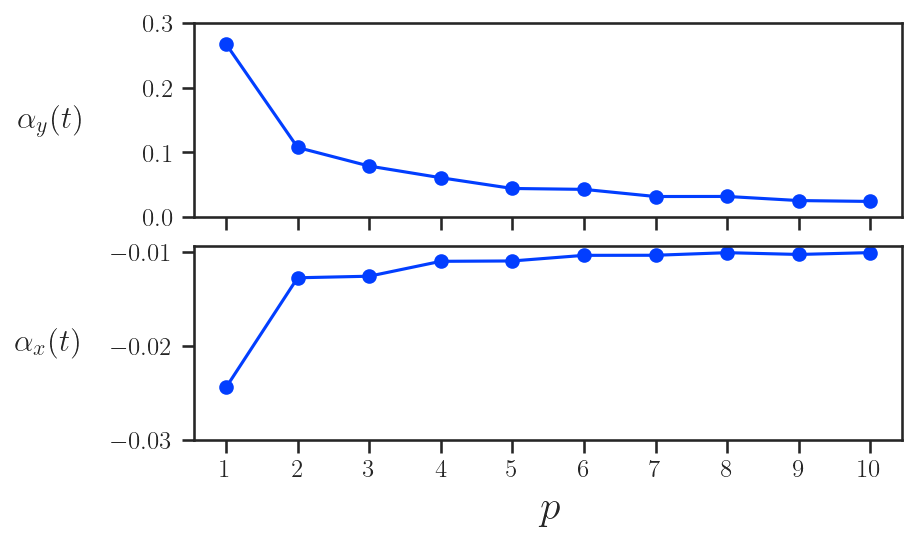

In [ ]:
Lxs = np.array( [(Lx*p - 0.5*(p-1)) for p in range(1,11,1)] )
Lys = np.array( [(Ly*p - 0.5*(p-1)) for p in range(1,11,1)] )

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(6, 3.5), layout='constrained')

ax[0].plot(ps['p'], ps['Vertical Disp']/Lys, '-o')

ax[1].plot(ps['p'], ps['Horizontal Disp']/Lxs, '-o')

ax[1].set_xlabel(r'$p$', fontsize=20)

ax[0].set_ylabel(r'$\alpha_y(t)$', rotation='horizontal', va='center', labelpad=44)
ax[1].set_ylabel(r'$\alpha_x (t)$', rotation='horizontal', va='center', labelpad=30)


ax[1].set_xticks(np.arange(1, 11, 1))
ax[1].set_yticks([-0.01, -0.02, -0.03])
ax[0].set_yticks([0.0, 0.1, 0.2, 0.3])

plt.savefig(f'{wd}/p_Variation_Displacements.svg', dpi=300)
plt.savefig(f'{wd}/p_Variation_Displacements.png', dpi=300)

plt.show()
